Assignment 2: Regression Using MAP and Basis Functions
Deadline: September 20, 2019 at 5pm

Machine Learning Assigment 2
Karolina Bargiel

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
range_of_data = 1

 # 1. Generate 50 2D-data points using the following function:  y = sin (x^2 +1)
def actual_distribution():
    x = np.arange(0, 1, 0.02)
    np.random.seed(0) 
    y = np.sin(x**2 +1)
   
    return x, y

# 2. Add Gaussian random noise to the data

def add_noise(y_curve):
    mu =0
    sigma = 0.04
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    
    
    return y_noise


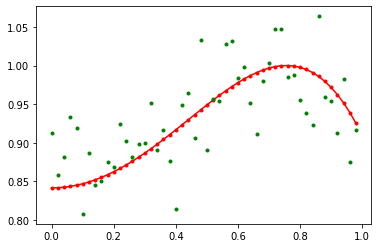

In [4]:
#3. Show the original curve line and the noisy data.

import matplotlib.pyplot as plt
x, y = actual_distribution()
t = add_noise(y)
plt.plot(x, y, "r")
plt.plot(x, y, "r.")
plt.plot(x, t, "g.")

plt.show()

The red line is the original curve based on the equation. The green dots are the noisy data.

In [5]:
# 3. Fit the generated noisy data using the MAP as discussed in class.


import numpy as matrix 
import math
M = 4
N = len(x)
sigma = 0.04
X = matrix.empty([N, M]) 
for i in range(M):
    for j in range(N):
        X[j, i] = x[j]**i
        
T = X.transpose()
alfa= 0.04
beta = 1/ (sigma **2)
alfa_over_beta =alfa/beta
II = matrix.identity(M)
Inv_1 = np.matmul((np.linalg.inv(np.matmul(T, X) + (alfa_over_beta*II))), T)



w = np.matmul(Inv_1, t)

#6.Display the estimated values of w

print(w)


y_new = np.matmul(X, w)

[ 0.899317   -0.38582145  1.60979485 -1.23776489]


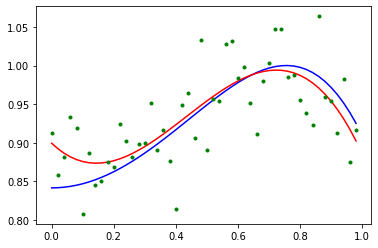

In [6]:
plt.plot(x, y, "b")
plt.plot(x, y_new, "r")
plt.plot(x, t, "g.")

plt.show()

In [7]:
#5.Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.

E =0.5 * np.matmul((y_new-t).transpose(),(y_new-t))
print(E)

0.04266681476726776


In below part I experiment with my code by changing M and alfa.

In [8]:
#7. Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha.

def add_bigger_noise(y_curve):
    mu =0
    sigma_e = 0.04
    noise = np.random.normal(mu, sigma_e, len(y_curve))
    np.random.seed(0) 
    y_noise = y_curve + noise
    
    
    return y_noise


M_e = 10
N_e = len(x)
sigma_e = 0.4
X_e = matrix.empty([N_e, M_e]) 
for i in range(M_e):
    for j in range(N_e):
        X_e[j, i] = x[j]**i
        
T_e = X_e.transpose()

t_e = add_bigger_noise(y)
alfa_over_beta_e = 0
II_e = matrix.identity(M_e)
Inv_1_e = np.matmul((np.linalg.inv(np.matmul(T_e, X_e) + (alfa_over_beta_e*II_e))), T_e)
w_e = np.matmul(Inv_1_e, t_e)


y_new_e = np.matmul(X_e, w_e)

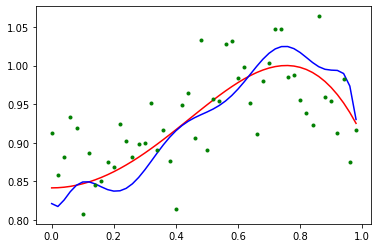

In [9]:
import matplotlib.pyplot as plt
plt.plot(x, y, "r")
plt.plot(x, y_new_e, "b")
plt.plot(x, t, "g.")

plt.show()

An example of overfitting problem with M =10, and alfa over bata =0

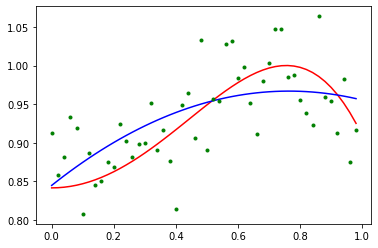

In [10]:

M_e = 3
N_e = len(x)
sigma_e = 0.4
X_e = matrix.empty([N_e, M_e]) 
for i in range(M_e):
    for j in range(N_e):
        X_e[j, i] = x[j]**i
        
T_e = X_e.transpose()

t_e = add_bigger_noise(y)
alfa_over_beta_e = 0
II_e = matrix.identity(M_e)
Inv_1_e = np.matmul((np.linalg.inv(np.matmul(T_e, X_e) + (alfa_over_beta_e*II_e))), T_e)
w_e = np.matmul(Inv_1_e, t_e)


y_new_e = np.matmul(X_e, w_e)

import matplotlib.pyplot as plt
plt.plot(x, y, "r")
plt.plot(x, y_new_e, "b")
plt.plot(x, t, "g.")

plt.show()

An example of underfitting problem with M =3

From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.

From the above experiment we can deduct that the increase of M is not affecting the change of the curve significantly, as long as alfa/beta component stays high. Lowering alpha over beta increases the sensitivity of the M, which can lead to overfitting problem. Under fitting is possible for M <= 3 . The above is an example of regularization .Regularization is a technique used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. In our example the use of alfa_over_beta minimizes the overfitting problem even for large values of M. That does not fully solve but help with our model selection problem, but helps it as the curve smoothies itself whenever the overfitting is very high. 


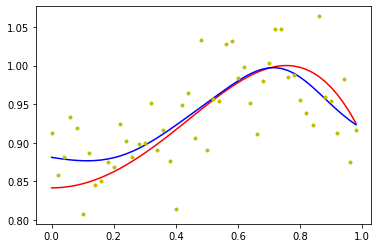

In [11]:
#PART 2 : Basis function 
#using MLE for regression
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

# 1. Generate 50 2D-data points using the following function:  y = sin (x^2 +1)
def actual_distribution():
    x = np.arange(0, 1, 0.02)
    np.random.seed(0) 
    y = np.sin(x**2 +1)
   
    return x, y

# 2. Add Gaussian random noise to the data

def add_noise(y_curve):
    mu =0
    sigma = 0.04
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    
    
    return y_noise

#3. Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.
def get_mu(i, M):
    mu = i * (range_of_data / M )
    
    return mu
#get_mu generates the mu for given step

def fay(x, mu, S): 
    xf = np.exp(-(((x-mu)**2))/(2*(S**2)))
                  
    return xf

#fay takes x, mu and S and generates the one-diemtional x output

import numpy as matrix 
x, y = actual_distribution()
M =4
N = len(x)



S = range_of_data / M
F = matrix.empty([N, M]) 
for i in range(M):
    for j in range(N):
        F[j, i] = (fay(x[j], get_mu(i, M), S)**i)
        
        
T_MLE = F.transpose()
J_MLE = np.linalg.inv(np.matmul(T_MLE, F))
t_MLE = add_noise(y)
w_bar_1 = np.matmul(np.matmul(J_MLE, T_MLE), t_MLE)

y_new_MLE = np.matmul(F, w_bar_1)

#4. Show your results for different values of M that generate overfitting and underfitting curves.
plt.plot(x, y, "r")
plt.plot(x, y_new_MLE, "b")
plt.plot(x, t, "y.")

plt.show()

Basis Gaussian function curve fitting for M =4.

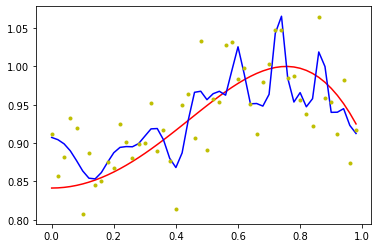

In [466]:
#MLE with over fitting problem

import numpy as matrix 
x, y = actual_distribution()
M =15
N = len(x)



S = range_of_data / M
F = matrix.empty([N, M]) 
for i in range(M):
    for j in range(N):
        F[j, i] = ((fay(x[j], get_mu(i, M), S))**i)
        
        
T_MLE = F.transpose()
J_MLE = np.linalg.inv(np.matmul(T_MLE, F))
t_MLE = add_noise(y)
w_bar_1 = np.matmul(np.matmul(J_MLE, T_MLE), t_MLE)

y_new_MLE = np.matmul(F, w_bar_1)


plt.plot(x, y, "r")
plt.plot(x, y_new_MLE, "b")
plt.plot(x, t_MLE, "y.")

plt.show()

Basis Gausian function with overfitting problem , M=15

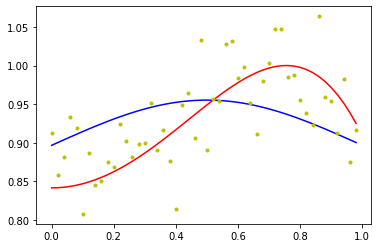

In [467]:
#MLE with under fitting problem

import numpy as matrix 
x, y = actual_distribution()
M =2
N = len(x)



S = range_of_data / M
F = matrix.empty([N, M]) 
for i in range(M):
    for j in range(N):
        F[j, i] = (fay(x[j], get_mu(i, M), S)**i)
        
        
T_MLE = F.transpose()
J_MLE = np.linalg.inv(np.matmul(T_MLE, F))
t_MLE = add_noise(y)
w_bar_1 = np.matmul(np.matmul(J_MLE, T_MLE), t_MLE)

y_new_MLE = np.matmul(F, w_bar_1)


plt.plot(x, y, "r")
plt.plot(x, y_new_MLE, "b")
plt.plot(x, t_MLE, "y.")

plt.show()

Basis Gausian function with overfitting problem , M=15

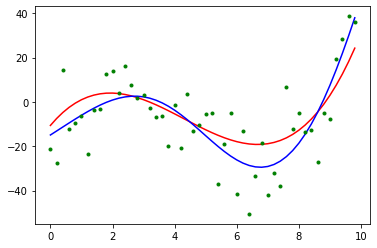

In [474]:
 #Sigmoid basis function
    
#5.Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.
#6.Change the original curve function to , and use the sigmoid basis function to estimate the best curve fitting from the noisy data.
    
def actual_distribution_3():
    x = np.arange(0, 10, 0.2);
  
    y = 0.4345*np.power(x,3) - 5.607 * np.power(x, 2) + 16.78*x - 10.61
    
    return x, y  

range_of_data_s = 10

def add_noise_s(y_curve):
    mu =0
    sigma = 14
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    
    
    return y_noise

def sig(d)  :
    s = (1/ (1 + np.exp(-d)))
    return s
#sigomoid function uses fay input (d) to compute the final x               
def get_mu(i, M):
   mu = i * (range_of_data_s / M )
   return mu
    
def fay(x, mu, S): 
    xf = sig((x - mu)/S)
                  
    return xf
#fay fuction calls the sig function to compute the sigomoid fay


import numpy as matrix 
x, y = actual_distribution_3()
M =5
N = len(x)



S = range_of_data_s / M
F = matrix.empty([N, M]) 
for i in range(M):
    for j in range(N):
        F[j, i] = (fay(x[j], get_mu(i, M), S)**i)
        
        
T_MLE = F.transpose()
J_MLE = np.linalg.inv(np.matmul(T_MLE, F))
t_MLE = add_noise_s(y)
w_bar_1 = np.matmul(np.matmul(J_MLE, T_MLE), t_MLE)

y_new_MLE = np.matmul(F, w_bar_1)


plt.plot(x, y, "r")
plt.plot(x, y_new_MLE, "b")
plt.plot(x, t_MLE, "g.")

plt.show()

 Sigmoid basis function curve fitting.

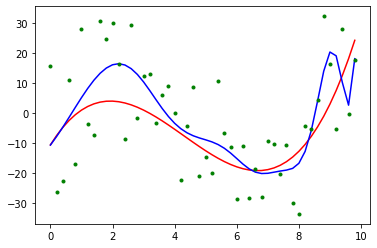

In [469]:
#7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.
#sigmoid function experiment value1
#M=12



import numpy as matrix 
x, y = actual_distribution_3()
M =12
N = len(x)



S = range_of_data_s / M
F = matrix.empty([N, M]) 
for i in range(M):
    for j in range(N):
        F[j, i] = (fay(x[j], get_mu(i, M), S)**i)
        
        
T_MLE = F.transpose()
J_MLE = np.linalg.inv(np.matmul(T_MLE, F))
t_MLE = add_noise_s(y)
w_bar_1 = np.matmul(np.matmul(J_MLE, T_MLE), t_MLE)

y_new_MLE = np.matmul(F, w_bar_1)


plt.plot(x, y, "r")
plt.plot(x, y_new_MLE, "b")
plt.plot(x, t_MLE, "g.")

plt.show()

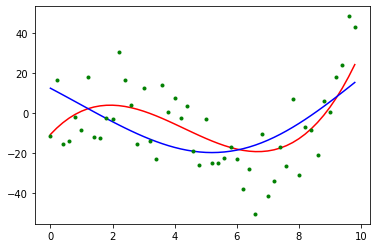

In [470]:
#sigmoid function experiment value 2. M =3


import numpy as matrix 
x, y = actual_distribution_3()
M =3
N = len(x)



S = range_of_data_s / M
F = matrix.empty([N, M]) 
for i in range(M):
    for j in range(N):
        F[j, i] = (fay(x[j], get_mu(i, M), S)**i)
        
        
T_MLE = F.transpose()
J_MLE = np.linalg.inv(np.matmul(T_MLE, F))
t_MLE = add_noise_s(y)
w_bar_1 = np.matmul(np.matmul(J_MLE, T_MLE), t_MLE)

y_new_MLE = np.matmul(F, w_bar_1)


plt.plot(x, y, "r")
plt.plot(x, y_new_MLE, "b")
plt.plot(x, t_MLE, "g.")

plt.show()

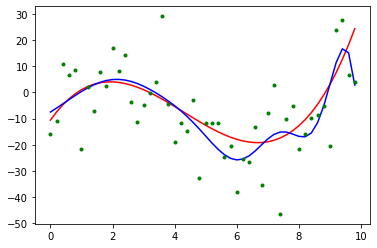

In [471]:
#sigmoid function experiment value 2. M =9
import numpy as matrix 
x, y = actual_distribution_3()
M =9
N = len(x)



S = range_of_data_s / M
F = matrix.empty([N, M]) 
for i in range(M):
    for j in range(N):
        F[j, i] = (fay(x[j], get_mu(i, M), S)**i)
        
        
T_MLE = F.transpose()
J_MLE = np.linalg.inv(np.matmul(T_MLE, F))
t_MLE = add_noise_s(y)
w_bar_1 = np.matmul(np.matmul(J_MLE, T_MLE), t_MLE)

y_new_MLE = np.matmul(F, w_bar_1)


plt.plot(x, y, "r")
plt.plot(x, y_new_MLE, "b")
plt.plot(x, t_MLE, "g.")

plt.show()

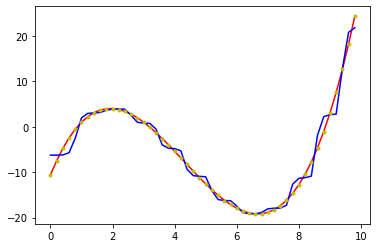

In [472]:
#Gassian experiment value 1
#M=12
import numpy as matrix 
x, y = actual_distribution_3()
M =12
N = len(x)



S = range_of_data / M
F = matrix.empty([N, M]) 
for i in range(M):
    for j in range(N):
        F[j, i] = (fay(x[j], get_mu(i, M), S)**i)
        
        
T_MLE = F.transpose()
J_MLE = np.linalg.inv(np.matmul(T_MLE, F))
t_MLE = add_noise(y)
w_bar_1 = np.matmul(np.matmul(J_MLE, T_MLE), t_MLE)

y_new_MLE = np.matmul(F, w_bar_1)


plt.plot(x, y, "r")
plt.plot(x, y_new_MLE, "b")
plt.plot(x, t_MLE, "y.")

plt.show()

     The advantages of basis function over polynomial function is mostly the possibility of handling multi dimensionality of data. Thanks to the "fi " function our x can be multidimensional.  

   Additionally we can also cover the expressiveness of a curve which is impossible in polynomial function. This expressiveness differ between different basis functions. The ones presented above are Gausian basis function and sigmoid basis function. The fitting process for thoses differ slightly as Gaussian gives us really smooth fitting as our model is made out of multiple gaussians, with “mu” dependent on the range of data. In comparison the sigmoid basis functions is more sharp as we use sigmoid function to fit in our data. 

   Overall Basic functions due to the increase of complexity can fit our prediction better than basis polynomial function. 
